In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Find the dataset at https://www.kaggle.com/datasets/tunguz/used-car-auction-prices

df = pd.read_csv('/content/drive/MyDrive/CSE422 Lab/Project/car_prices.csv', on_bad_lines='skip')

###Exploratory Data Analysis

In [ ]:
df.head(20)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350,10900,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
6,2014,BMW,M5,Base,Sedan,automatic,wbsfv9c51ed593089,ca,3.4,14943.0,black,black,the hertz corporation,69000,65000,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,ca,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900,9800,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
8,2014,Audi,A4,2.0T Premium Plus quattro,Sedan,automatic,wauffafl3en030343,ca,4.2,9557.0,white,black,audi mission viejo,32100,32250,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
9,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d37e9218789,ca,3.0,4809.0,red,black,d/m auto sales inc,26300,17500,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)


In [ ]:
df = df.head(70000)
df.size

1120000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          70000 non-null  int64  
 1   make          69709 non-null  object 
 2   model         69692 non-null  object 
 3   trim          69494 non-null  object 
 4   body          67892 non-null  object 
 5   transmission  61590 non-null  object 
 6   vin           70000 non-null  object 
 7   state         70000 non-null  object 
 8   condition     58208 non-null  float64
 9   odometer      69925 non-null  float64
 10  color         69841 non-null  object 
 11  interior      69841 non-null  object 
 12  seller        70000 non-null  object 
 13  mmr           70000 non-null  int64  
 14  sellingprice  70000 non-null  int64  
 15  saledate      70000 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 8.5+ MB


In [ ]:
df.isnull().sum()

,0
year,0
make,291
model,308
trim,506
body,2108
transmission,8410
vin,0
state,0
condition,11792
odometer,75


In [ ]:
df.shape

(70000, 16)

In [ ]:
df.describe()

,year,condition,odometer,mmr,sellingprice
count,70000.0000,58208.000000,69925.000000,70000.000000,70000.000000
mean,2009.0579,3.318954,77750.005906,12284.963929,11906.968000
std,4.3828,0.985452,58990.414253,9562.315558,9559.910659
min,1985.0000,1.000000,1.000000,25.000000,1.000000
25%,2006.0000,2.500000,30396.000000,5000.000000,4600.000000
50%,2011.0000,3.500000,64286.000000,10950.000000,10500.000000
75%,2013.0000,4.100000,114877.000000,16750.000000,16500.000000
max,2015.0000,5.000000,999999.000000,157000.000000,156000.000000


In [ ]:
df.nunique()

,0
year,31
make,92
model,858
trim,1577
body,42
transmission,2
vin,69854
state,36
condition,41
odometer,56725


###Data Visualization

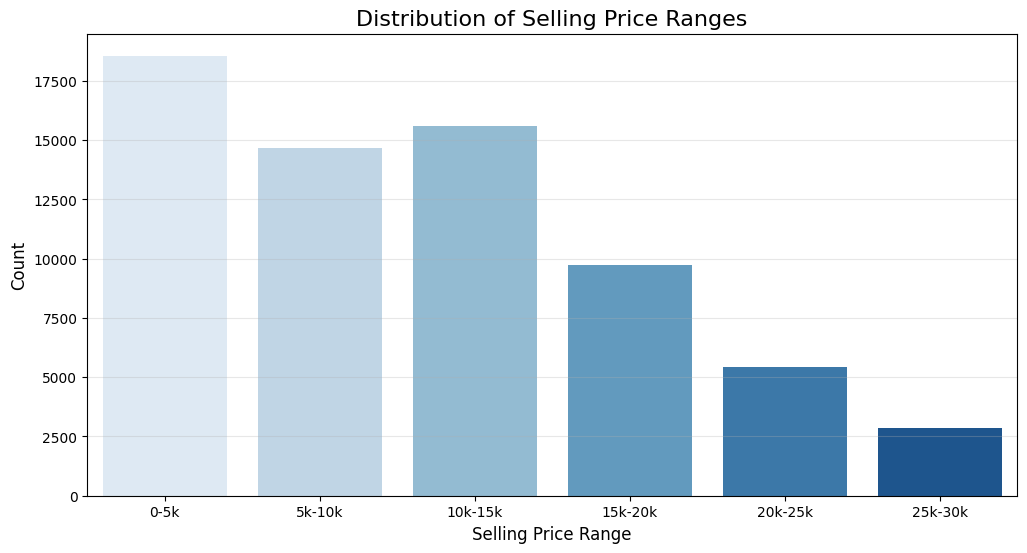

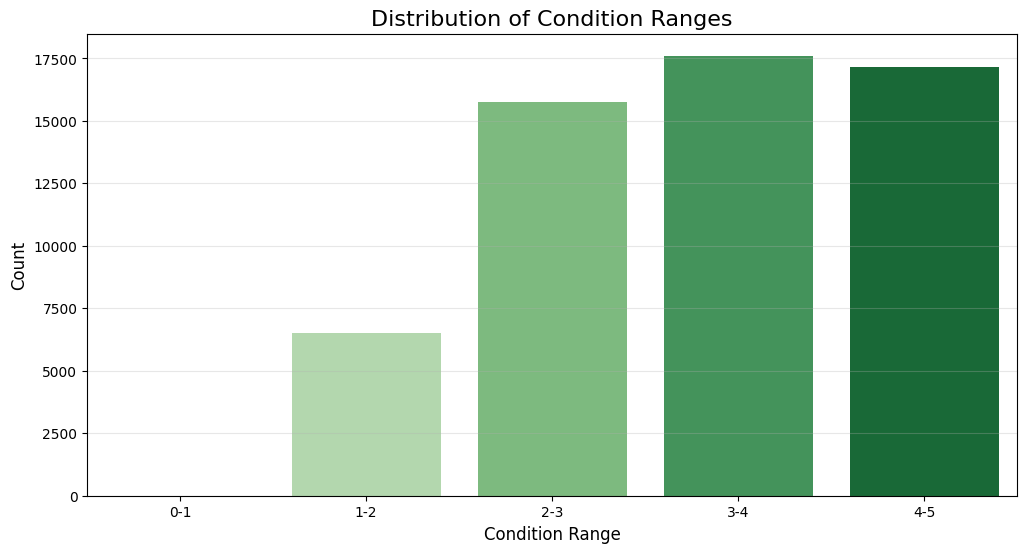

In [ ]:
selling_price_bins = [0, 5000, 10000, 15000, 20000, 25000, 30000]
selling_price_labels = ["0-5k", "5k-10k", "10k-15k", "15k-20k", "20k-25k", "25k-30k"]

condition_bins = [0, 1, 2, 3, 4, 5]
condition_labels = ["0-1", "1-2", "2-3", "3-4", "4-5"]

df['sellingprice_range'] = pd.cut(df['sellingprice'], bins=selling_price_bins, labels=selling_price_labels, right=False)
df['condition_range'] = pd.cut(df['condition'], bins=condition_bins, labels=condition_labels, right=False)

# Plotting Selling Price Range Histogram
plt.figure(figsize=(12, 6))
sns.countplot(x='sellingprice_range', data=df, palette='Blues', order=selling_price_labels)
plt.title('Distribution of Selling Price Ranges', fontsize=16)
plt.xlabel('Selling Price Range', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

# Plotting Condition Range Histogram
plt.figure(figsize=(12, 6))
sns.countplot(x='condition_range', data=df, palette='Greens', order=condition_labels)
plt.title('Distribution of Condition Ranges', fontsize=16)
plt.xlabel('Condition Range', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.show()

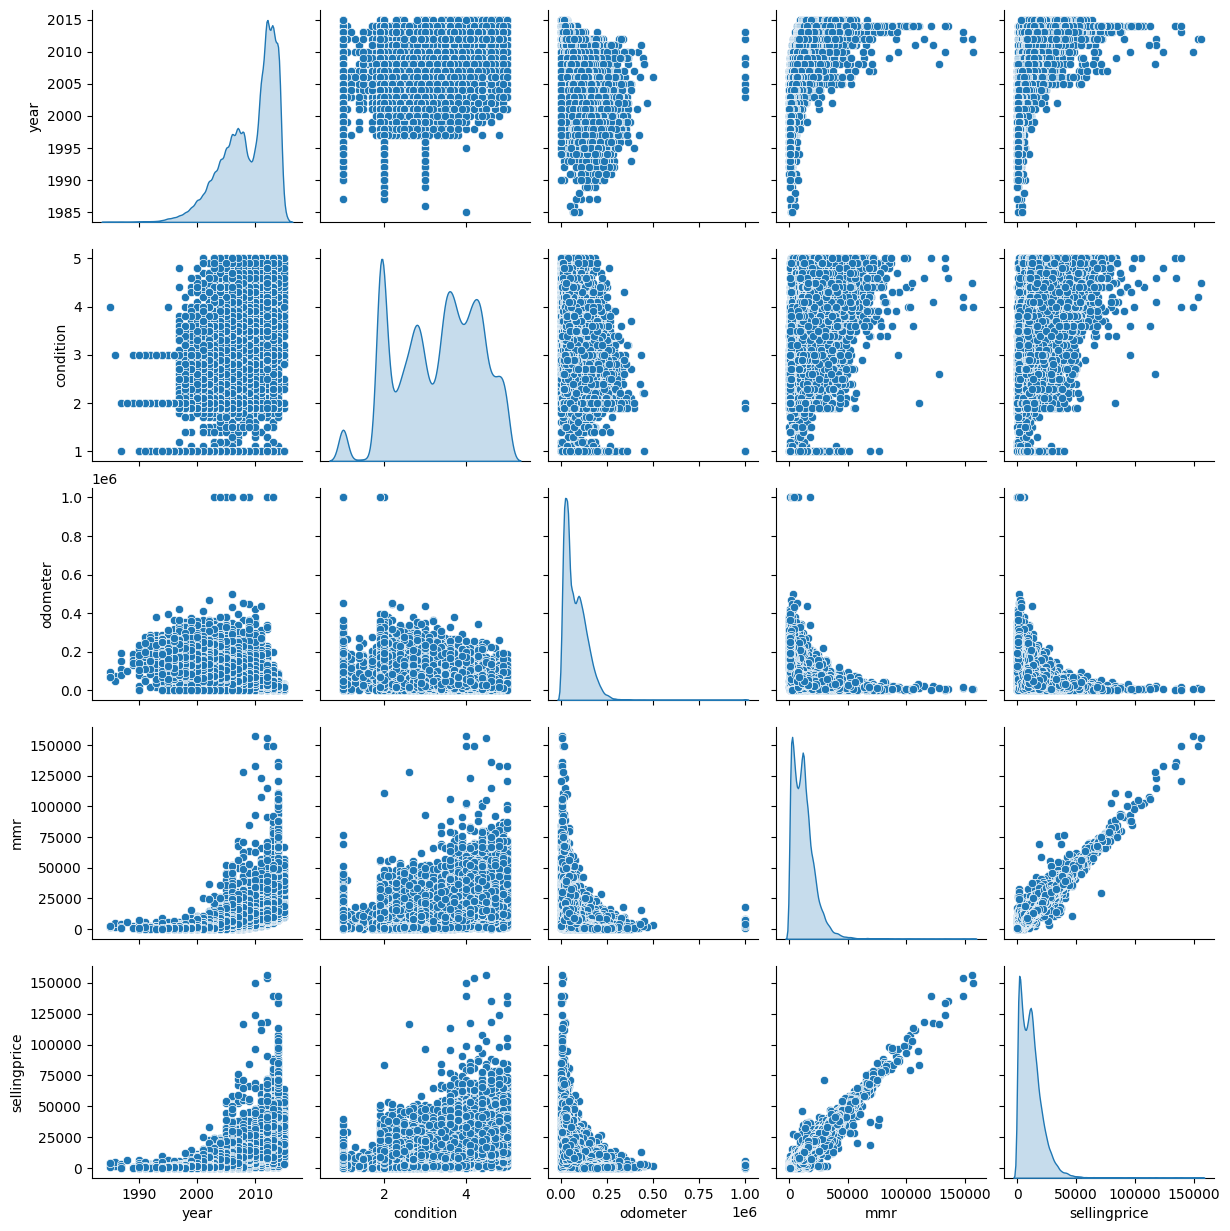

In [ ]:
import seaborn as sns

# Pair plot with seaborn
sns.pairplot(df, diag_kind="kde")


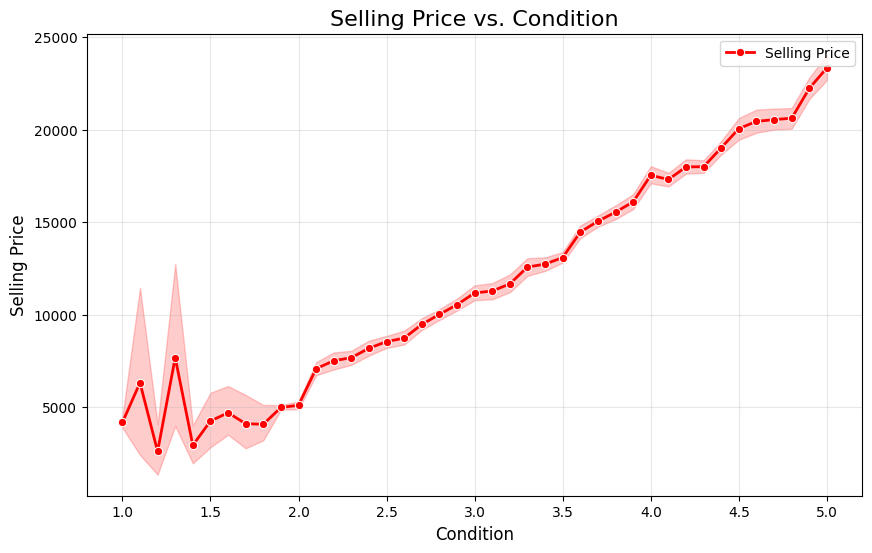

In [ ]:
# Plotting Selling Price vs. Condition as a Line Graph

plt.figure(figsize=(10, 6))
sns.lineplot(x='condition', y='sellingprice', data=df, color='red', marker='o', linewidth=2, label='Selling Price')

plt.title('Selling Price vs. Condition', fontsize=16)
plt.xlabel('Condition', fontsize=12)
plt.ylabel('Selling Price', fontsize=12)
plt.grid(alpha=0.3)
plt.legend()
plt.show()

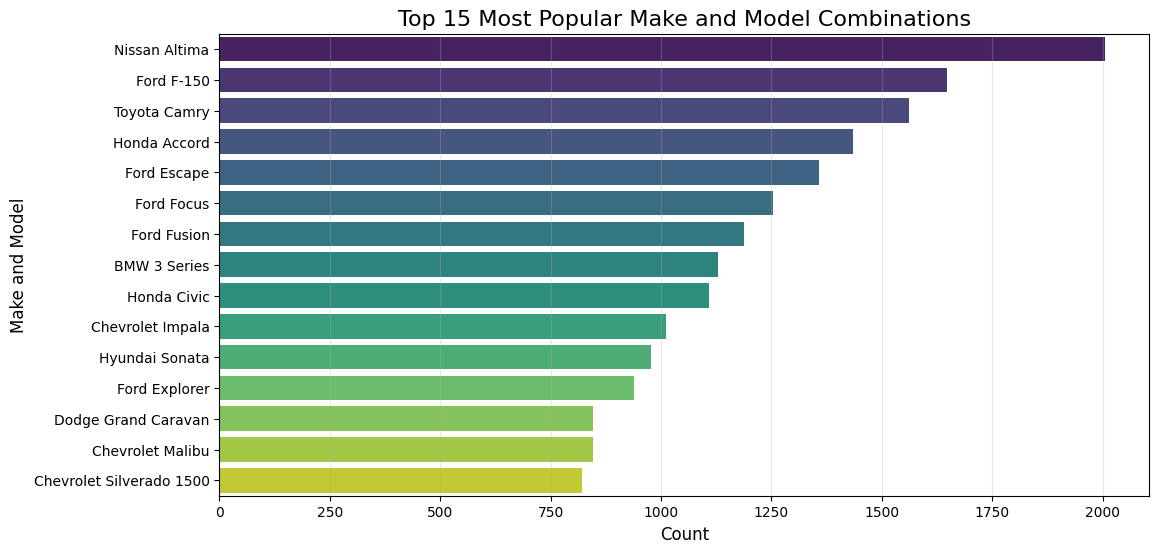

In [ ]:
# Plot to visualize Most Popular Make and Model Combination

df['make_model'] = df['make'] + " " + df['model']

make_model_counts = df['make_model'].value_counts().reset_index()
make_model_counts.columns = ['make_model', 'count']

plt.figure(figsize=(12, 6))
sns.barplot(x='count', y='make_model', data=make_model_counts.head(15), palette='viridis')
plt.title('Top 15 Most Popular Make and Model Combinations', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Make and Model', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.show()

In [ ]:
!pip install squarify

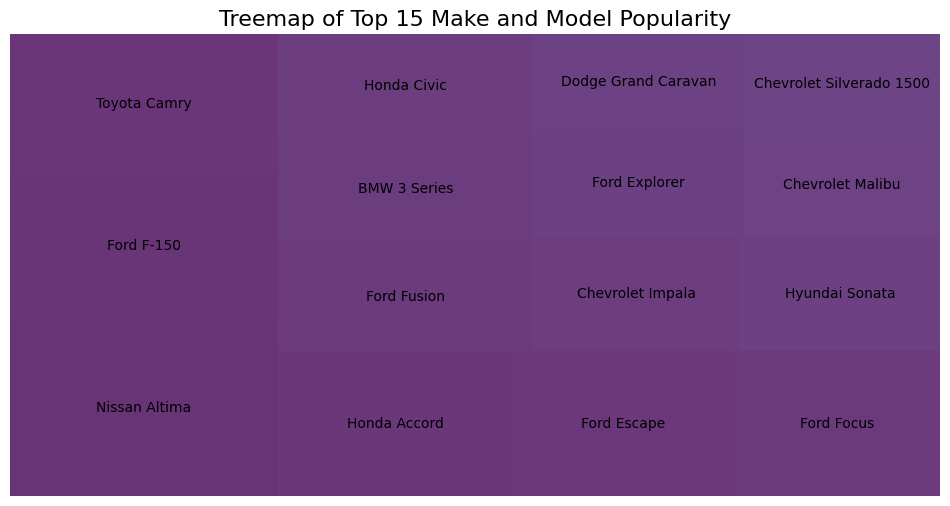

In [ ]:
# Treemap plot for top 10 make-model combinations

import squarify

plt.figure(figsize=(12, 6))
squarify.plot(
    sizes=make_model_counts['count'].head(15),
    label=make_model_counts['make_model'].head(15),
    alpha=0.8,
    color=plt.cm.viridis(range(15))
)
plt.title('Treemap of Top 15 Make and Model Popularity', fontsize=16)
plt.axis('off')
plt.show()

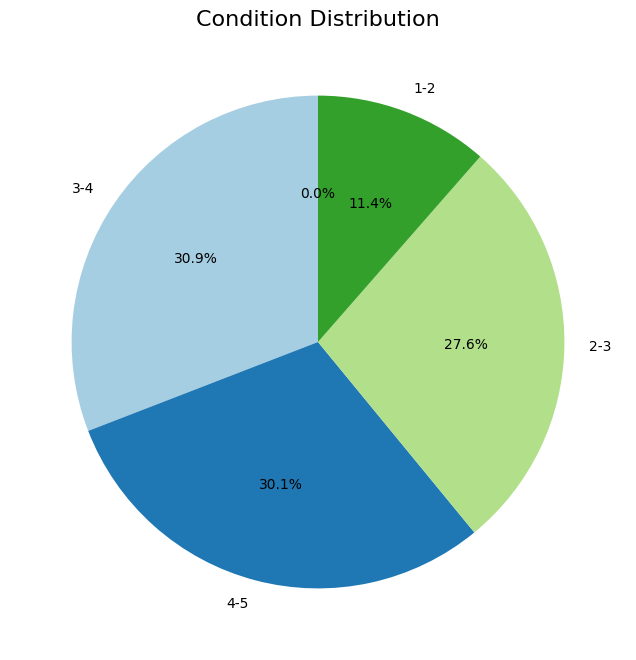

In [ ]:
# Plot to visualize Condition Distribution

condition_bins = [0, 1, 2, 3, 4, 5]
condition_labels = ["0-1", "1-2", "2-3", "3-4", "4-5"]
df['condition_range'] = pd.cut(df['condition'], bins=condition_bins, labels=condition_labels, right=False)

condition_counts = df['condition_range'].value_counts()

plt.figure(figsize=(8, 8))
condition_counts.plot(kind='pie', autopct='%1.1f%%', colors=plt.cm.Paired.colors, startangle=90)
plt.title('Condition Distribution', fontsize=16)
plt.ylabel('')
plt.show()

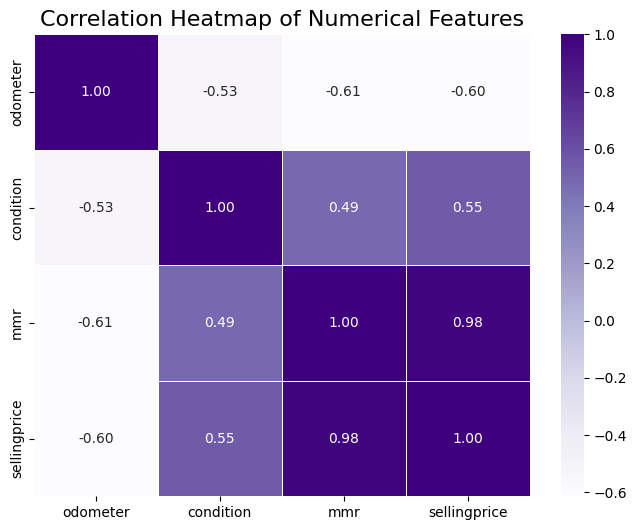

In [ ]:
# Plot to explore Correlation Heatmap of Numerical Features

numerical_features = ['odometer', 'condition', 'mmr', 'sellingprice']
corr_matrix = df[numerical_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Purples', fmt='.2f', linewidths=0.5, cbar=True)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

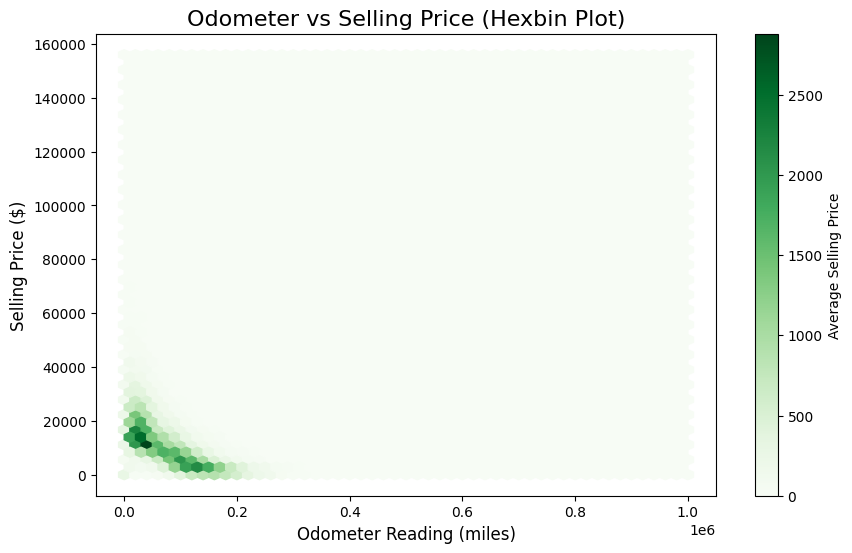

In [ ]:
# Hexbin Plot to visualize Distribution of Odometer vs Selling Price

plt.figure(figsize=(10, 6))

plt.hexbin(df['odometer'], df['sellingprice'], gridsize=50, cmap='Greens', reduce_C_function=np.mean)

plt.colorbar(label='Average Selling Price')
plt.title('Odometer vs Selling Price (Hexbin Plot)', fontsize=16)
plt.xlabel('Odometer Reading (miles)', fontsize=12)
plt.ylabel('Selling Price ($)', fontsize=12)
plt.show()

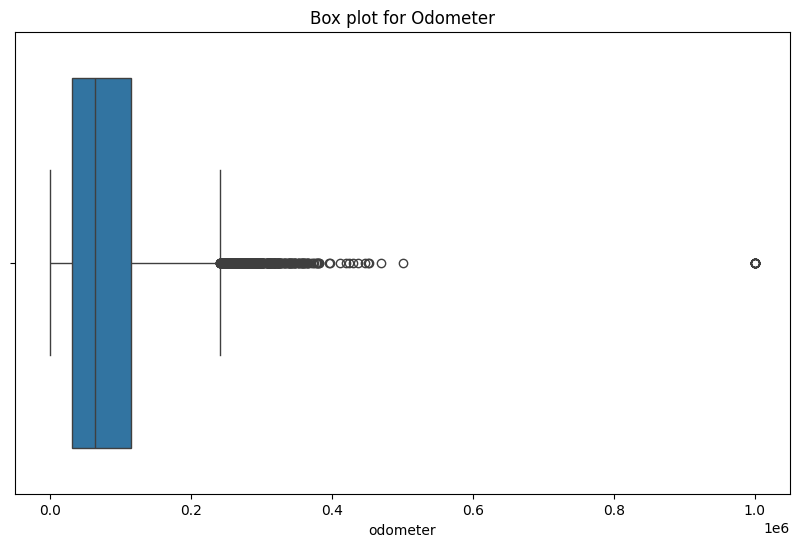

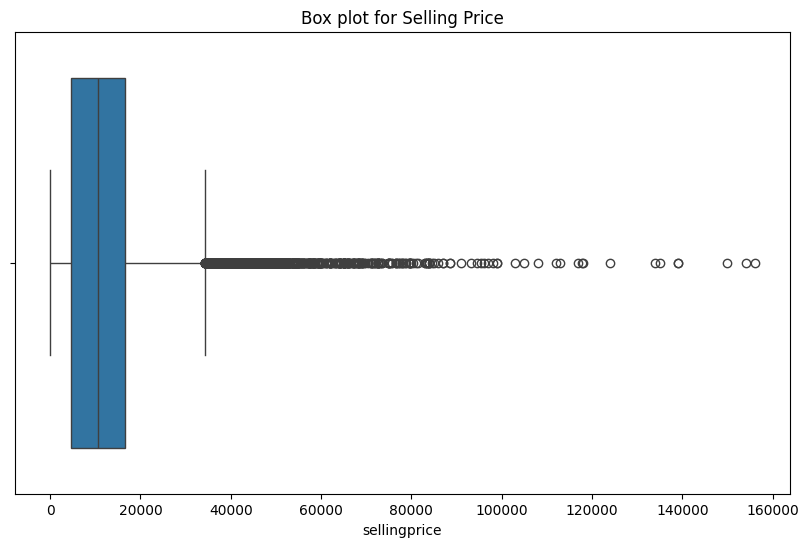

In [ ]:
# Box plot for 'odometer' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['odometer'])
plt.title('Box plot for Odometer')
plt.show()

# Box plot for 'sellingprice' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['sellingprice'])
plt.title('Box plot for Selling Price')
plt.show()

###Data Preprocessing

In [ ]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

year                   0.000000
make                   0.415714
model                  0.440000
trim                   0.722857
body                   3.011429
transmission          12.014286
vin                    0.000000
state                  0.000000
condition             16.845714
odometer               0.107143
color                  0.227143
interior               0.227143
seller                 0.000000
mmr                    0.000000
sellingprice           0.000000
saledate               0.000000
sellingprice_range     4.465714
condition_range       18.527143
make_model             0.440000
dtype: float64


In [ ]:
columns_with_missing = df.columns[df.isnull().any()]
print(columns_with_missing)

Index(['make', 'model', 'trim', 'body', 'transmission', 'condition',
       'odometer', 'color', 'interior', 'sellingprice_range',
       'condition_range', 'make_model'],
      dtype='object')


In [ ]:
missing_rows = df[df['make'].isnull()]
missing_rows.shape

(291, 19)

In [ ]:
df = df.dropna(subset=['make', 'model'], how='all')

In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

for col in numerical_columns:
    if df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mean(), inplace=True)

print(df.isnull().sum())

year                      0
make                      0
model                    17
trim                    215
body                   1817
transmission           8342
vin                       0
state                     0
condition                 0
odometer                  0
color                   157
interior                157
seller                    0
mmr                       0
sellingprice              0
saledate                  0
sellingprice_range     3106
condition_range       12882
make_model               17
dtype: int64


In [ ]:
df['model'].fillna('Unknown', inplace=True)
df['trim'].fillna('Unknown', inplace=True)
df['body'].fillna('Unknown', inplace=True)
df['transmission'].fillna('Unknown', inplace=True)

df['color'].fillna(df['color'].mode()[0], inplace=True)
df['interior'].fillna(df['interior'].mode()[0], inplace=True)

In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

year                      0
make                      0
model                     0
trim                      0
body                      0
transmission              0
vin                       0
state                     0
condition                 0
odometer                  0
color                     0
interior                  0
seller                    0
mmr                       0
sellingprice              0
saledate                  0
sellingprice_range     3106
condition_range       12882
make_model               17
dtype: int64


In [ ]:
duplicates = df.duplicated()
print(f"Number of duplicate rows: {duplicates.sum()}")

Number of duplicate rows: 0


###Feature Engineering

In [ ]:
from scipy.stats import zscore

# Calculate Z-scores for the numerical columns
df['odometer_zscore'] = zscore(df['odometer'])
df['sellingprice_zscore'] = zscore(df['sellingprice'])

# Check for outliers (Z-score greater than 3 or less than -3)
odometer_outliers = df[df['odometer_zscore'].abs() > 3]
sellingprice_outliers = df[df['sellingprice_zscore'].abs() > 3]

print(f"Odometer outliers: {odometer_outliers.shape[0]}")
print(f"Selling price outliers: {sellingprice_outliers.shape[0]}")

Odometer outliers: 495
Selling price outliers: 900


In [ ]:
# Remove rows where odometer or sellingprice is an outlier (Z-score > 3 or < -3)

df = df[(df['odometer_zscore'].abs() <= 3) & (df['sellingprice_zscore'].abs() <= 3)]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68314 entries, 0 to 69999
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   year                 68314 non-null  int64   
 1   make                 68314 non-null  object  
 2   model                68314 non-null  object  
 3   trim                 68314 non-null  object  
 4   body                 68314 non-null  object  
 5   transmission         68314 non-null  object  
 6   vin                  68314 non-null  object  
 7   state                68314 non-null  object  
 8   condition            68314 non-null  float64 
 9   odometer             68314 non-null  float64 
 10  color                68314 non-null  object  
 11  interior             68314 non-null  object  
 12  seller               68314 non-null  object  
 13  mmr                  68314 non-null  int64   
 14  sellingprice         68314 non-null  int64   
 15  saledate             683

In [ ]:
df['saledate'] = pd.to_datetime(df['saledate'], errors='coerce', utc=True)
df['year'] = df['saledate'].dt.year.astype(int)
df.head(2)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,...,interior,seller,mmr,sellingprice,saledate,sellingprice_range,condition_range,make_model,odometer_zscore,sellingprice_zscore
0,2014,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,...,black,"kia motors america, inc",20500,21500,2014-12-16 04:30:00+00:00,20k-25k,NaN,Kia Sorento,-1.035247,1.002887
1,2014,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,...,beige,"kia motors america, inc",20800,21500,2014-12-16 04:30:00+00:00,20k-25k,NaN,Kia Sorento,-1.158385,1.002887


In [ ]:
df = df.drop(columns=['vin','saledate','odometer_zscore','sellingprice_zscore','sellingprice_range','condition_range','make_model'])
df.head(1)

,year,make,model,trim,body,transmission,state,condition,odometer,color,interior,seller,mmr,sellingprice
0,2014,Kia,Sorento,LX,SUV,automatic,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68314 entries, 0 to 69999
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   year          68314 non-null  int64  
 1   make          68314 non-null  object 
 2   model         68314 non-null  object 
 3   trim          68314 non-null  object 
 4   body          68314 non-null  object 
 5   transmission  68314 non-null  object 
 6   state         68314 non-null  object 
 7   condition     68314 non-null  float64
 8   odometer      68314 non-null  float64
 9   color         68314 non-null  object 
 10  interior      68314 non-null  object 
 11  seller        68314 non-null  object 
 12  mmr           68314 non-null  int64  
 13  sellingprice  68314 non-null  int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 7.8+ MB


###One-Hot Encoding // Label Encoding

In [ ]:
print(df.dtypes)

categorical_columns = df.select_dtypes(include=['object']).columns
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")

year              int64
make             object
model            object
trim             object
body             object
transmission     object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr               int64
sellingprice      int64
dtype: object
make: 88 unique values
model: 828 unique values
trim: 1516 unique values
body: 43 unique values
transmission: 3 unique values
state: 36 unique values
color: 20 unique values
interior: 17 unique values
seller: 6310 unique values


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

high_cardinality_columns = ['make', 'model', 'trim','body','seller']
for col in high_cardinality_columns:
    df[col] = le.fit_transform(df[col].fillna('Unknown'))

In [ ]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first')

encoded = encoder.fit_transform(df[['transmission', 'state', 'color', 'interior']]).toarray()

encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(['transmission', 'state', 'color', 'interior']))

df = pd.concat([df.drop(['transmission', 'state', 'color', 'interior'], axis=1), encoded_df], axis=1)


In [ ]:
df.head()


,year,make,model,trim,body,condition,odometer,seller,mmr,sellingprice,...,interior_green,interior_off-white,interior_orange,interior_purple,interior_red,interior_silver,interior_tan,interior_white,interior_yellow,interior_—
0,2014.0,21.0,557.0,762.0,32.0,5.0,16639.0,3230.0,20500.0,21500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014.0,21.0,557.0,762.0,32.0,5.0,9393.0,3230.0,20800.0,21500.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2015.0,2.0,7.0,222.0,33.0,4.5,1331.0,2241.0,31900.0,30000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2015.0,44.0,504.0,1074.0,33.0,4.1,14282.0,6089.0,27500.0,27750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,2014.0,31.0,58.0,96.0,33.0,1.0,5554.0,2083.0,15350.0,10900.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###Train-Test Split

In [ ]:
# Train Test And Split

from sklearn.model_selection import train_test_split

X = df.drop(columns=['sellingprice'])
y = df['sellingprice']

In [ ]:
# Before fitting the model
# Impute NaN in 'sellingprice' with the mean
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
y = imputer.fit_transform(y.values.reshape(-1, 1))
y = y.ravel()  # Convert back to 1D array


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

###Model Training

*   Random Forest



In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)



*   Evaluation of Random Forest



In [ ]:
y_pred_rf = rf_model.predict(X_test)

mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest MAE: {mae_rf:.2f}")
print(f"Random Forest MSE: {mse_rf:.2f}")
print(f"Random Forest RMSE: {rmse_rf:.2f}")
print(f"Random Forest R²: {r2_rf:.2f}")

Random Forest MAE: 974.75
Random Forest MSE: 2343037.62
Random Forest RMSE: 1530.70
Random Forest R²: 0.96


In [ ]:
print("Test set score: {:.2f}".format(rf_model.score(X_test, y_test)))

Test set score: 0.96




*   Decision Tree


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [ ]:
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)

dt_model.fit(X_train, y_train)


DecisionTreeRegressor(max_depth=10, random_state=42)


*   Evaluation of Decision Tree Regressor





In [ ]:
# Predict the target variable for test data
y_pred_dt = dt_model.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = mse_dt ** 0.5
r2_dt = r2_score(y_test, y_pred_dt)

print(f"Decision Tree MAE: {mae_dt:.2f}")
print(f"Decision Tree MSE: {mse_dt:.2f}")
print(f"Decision Tree RMSE: {rmse_dt:.2f}")
print(f"Decision Tree R²: {r2_dt:.2f}")


Decision Tree MAE: 1050.44
Decision Tree MSE: 3070751.01
Decision Tree RMSE: 1752.36
Decision Tree R²: 0.95


In [ ]:
print("Test set score: {:.2f}".format(dt_model.score(X_test, y_test)))

Test set score: 0.95


*   Neural Network





In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
import numpy as np

print("NaNs in X_train_scaled:", np.isnan(X_train_scaled).sum())
print("Infs in X_train_scaled:", np.isinf(X_train_scaled).sum())


NaNs in X_train_scaled: 93366
Infs in X_train_scaled: 0


In [ ]:
X_train_scaled = np.nan_to_num(X_train_scaled)
X_test_scaled = np.nan_to_num(X_test_scaled)


In [ ]:
print("X_train_scaled Mean:", X_train_scaled.mean(axis=0))
print("X_train_scaled Std Dev:", X_train_scaled.std(axis=0))


X_train_scaled Mean: [-1.46436882e-13  5.57072236e-17  8.70425369e-17  2.28486659e-17
 -2.78536118e-17  6.07556908e-16  1.63930111e-17  8.83481749e-17
 -6.67326116e-18 -9.64721451e-18 -6.26706266e-17  3.16254551e-17
 -2.55324775e-17  1.59577984e-17  1.45070895e-18  7.83382832e-17
  8.99439548e-18 -7.83382832e-17  7.83382832e-18 -1.59577984e-17
  1.49423022e-17 -2.08902089e-17 -1.84240036e-17  2.74183991e-17
 -1.36366641e-17  5.80283579e-19 -5.22255221e-18  1.59577984e-17
 -1.21859552e-17  3.91691416e-18 -2.20507760e-17 -3.88789998e-17
 -5.57072236e-17 -2.32113432e-18  2.10352797e-17  2.90141790e-19
 -2.32113432e-18  2.78536118e-17 -3.19155969e-18 -5.46191919e-17
 -3.83712517e-17 -4.96142460e-17  1.07352462e-17 -5.51269400e-18
  3.19155969e-17  1.59577984e-18 -4.99043878e-17 -3.01747461e-17
  1.45070895e-17 -5.07748132e-17  2.90141790e-18 -7.83382832e-17
 -5.80283579e-19 -5.51269400e-18  1.16056716e-18  5.33860893e-17
  2.06000671e-17  1.74085074e-18  4.06198506e-17  3.07550297e-17
 -4.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the neural network
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [ ]:
history = nn_model.fit(X_train_scaled, y_train,
                       validation_split=0.2,
                       epochs=50,
                       batch_size=32,
                       verbose=1)


Epoch 1/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 151172576.0000 - mae: 9602.7627 - val_loss: 12348471.0000 - val_mae: 2537.2661
Epoch 2/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9742358.0000 - mae: 2269.7544 - val_loss: 6102371.0000 - val_mae: 1720.3524
Epoch 3/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 5352475.5000 - mae: 1626.8457 - val_loss: 4999707.0000 - val_mae: 1505.2584
Epoch 4/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4618459.0000 - mae: 1477.6497 - val_loss: 4653454.5000 - val_mae: 1432.9729
Epoch 5/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 4317547.0000 - mae: 1413.9806 - val_loss: 4417859.0000 - val_mae: 1386.5062
Epoch 6/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 4202436.0000 - mae: 1369.6533 - val_loss: 4208692.5000 - val_mae: 1346.8949
Epoch 7/50
1225/1225 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 3663831.0000 - mae: 1315.6880 - val_loss: 4006796.5000 - val_mae: 1303.1680
Epoch 8/50
1225/1225 ━━━━━━━━━━



*   Evaluation of Neural Network




In [ ]:
# Evaluate on test data
test_loss, test_mae = nn_model.evaluate(X_test_scaled, y_test)

print(f"Test Loss (MSE): {test_loss:.2f}")
print(f"Test MAE: {test_mae:.2f}")


656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2521902.2500 - mae: 1023.5993
Test Loss (MSE): 2636784.50
Test MAE: 1028.61


In [ ]:
y_pred_nn = nn_model.predict(X_test_scaled)

# Example: Compare first 10 predictions with actual values
print("Actual vs. Predicted Selling Prices:")
for actual, predicted in zip(y_test[:10], y_pred_nn[:10]):
    print(f"Actual: {actual}, Predicted: {predicted[0]:.2f}")


656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Actual vs. Predicted Selling Prices:
Actual: 15600.0, Predicted: 13186.65
Actual: 9400.0, Predicted: 9457.76
Actual: 10900.0, Predicted: 11089.43
Actual: 33200.0, Predicted: 34816.29
Actual: 18250.0, Predicted: 17373.42
Actual: 4000.0, Predicted: 3698.16
Actual: 16200.0, Predicted: 16561.70
Actual: 6100.0, Predicted: 6531.03
Actual: 2400.0, Predicted: 2045.70
Actual: 13750.0, Predicted: 11098.86


In [ ]:
y_pred_nn = nn_model.predict(X_test_scaled).flatten()

mae_nn = mean_absolute_error(y_test, y_pred_nn)
mse_nn = mean_squared_error(y_test, y_pred_nn)
rmse_nn = mse_nn ** 0.5
r2_nn = r2_score(y_test, y_pred_nn)

print(f"Neural Network MAE: {mae_nn:.2f}")
print(f"Neural Network MSE: {mse_nn:.2f}")
print(f"Neural Network RMSE: {rmse_nn:.2f}")
print(f"Neural Network R²: {r2_nn:.2f}")


656/656 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Neural Network MAE: 1028.61
Neural Network MSE: 2636784.00
Neural Network RMSE: 1623.82
Neural Network R²: 0.96


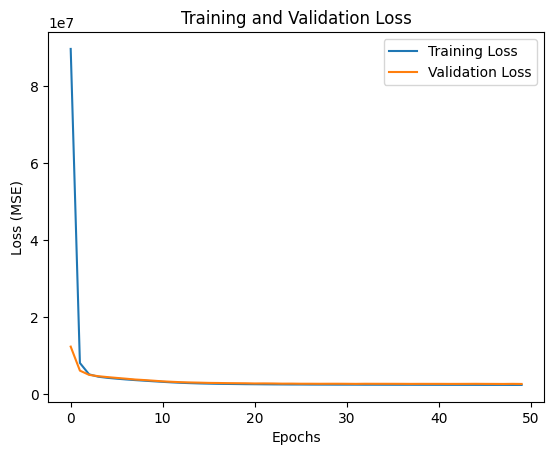

In [ ]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

In [ ]:
results = pd.DataFrame({
    "Model": ["Random Forest", "Decision Tree", "Neural Network"],
    "MAE": [mae_rf, mae_dt, mae_nn],
    "MSE": [mse_rf, mse_dt, mse_nn],
    "RMSE": [rmse_rf, rmse_dt, rmse_nn],
    "R²": [r2_rf, r2_dt, r2_nn]
})

print(results)


            Model          MAE           MSE         RMSE        R²
0   Random Forest   974.752614  2.343038e+06  1530.698410  0.964771
1   Decision Tree  1050.440709  3.070751e+06  1752.355847  0.953830
2  Neural Network  1028.613146  2.636784e+06  1623.817723  0.960355


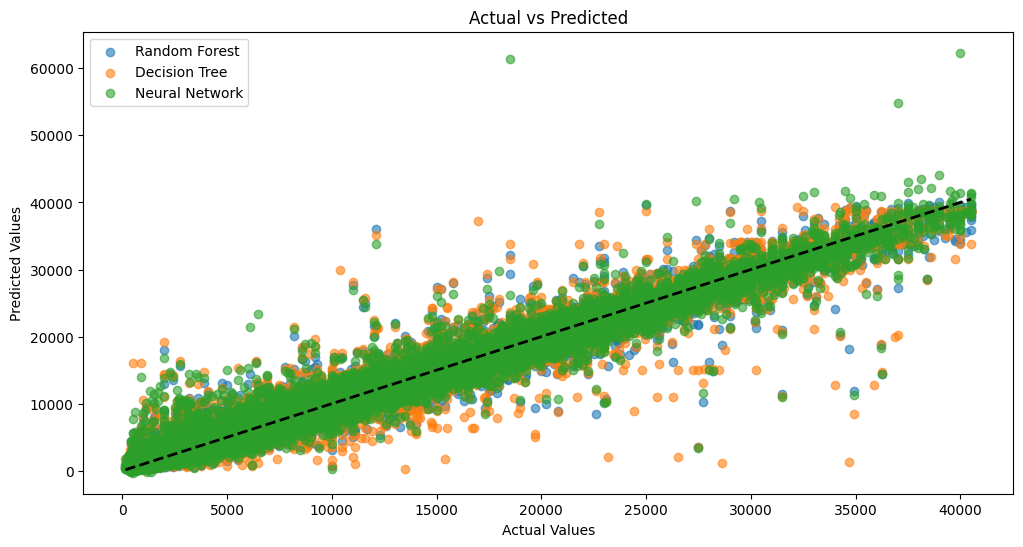

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred_rf, label="Random Forest", alpha=0.6)
plt.scatter(y_test, y_pred_dt, label="Decision Tree", alpha=0.6)
plt.scatter(y_test, y_pred_nn, label="Neural Network", alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.legend()
plt.show()

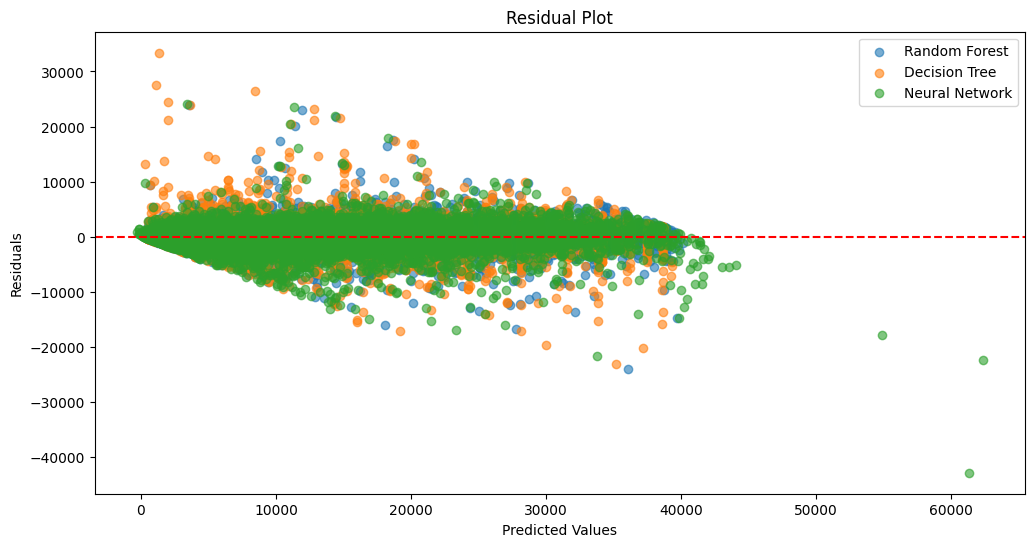

In [ ]:
plt.figure(figsize=(12, 6))
plt.scatter(y_pred_rf, y_test - y_pred_rf, label="Random Forest", alpha=0.6)
plt.scatter(y_pred_dt, y_test - y_pred_dt, label="Decision Tree", alpha=0.6)
plt.scatter(y_pred_nn, y_test - y_pred_nn, label="Neural Network", alpha=0.6)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.legend()
plt.show()

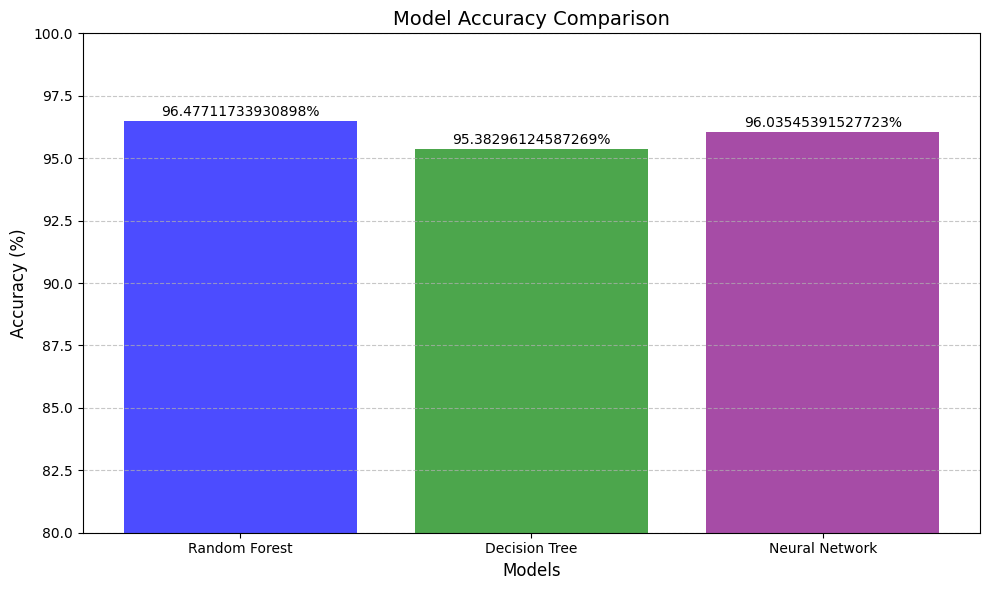

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model accuracies
models = ["Random Forest", "Decision Tree", "Neural Network"]
accuracies = [r2_rf*100, r2_dt*100, r2_nn*100]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'purple'], alpha=0.7)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.title("Model Accuracy Comparison", fontsize=14)
plt.ylim(80, 100)
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.2, f"{acc}%", ha='center', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
